# Tokenization & Tokenizer
### 참고자료
* "C:\Users\lenovo\Documents\aibootcamp\Natural Language Processing\ch3_token_ner_seq.pdf"
## Tokenization
* text를 word또는 sub-word로 분리하는 것
## Tokenizer
* 사전방식 - KoNLPy (Komoran, Mecab, Okt etc) => 언어지식 필요
* sub-word방식 => 언어지식불필요, 다수의 언어에 공통으로 적용 가능

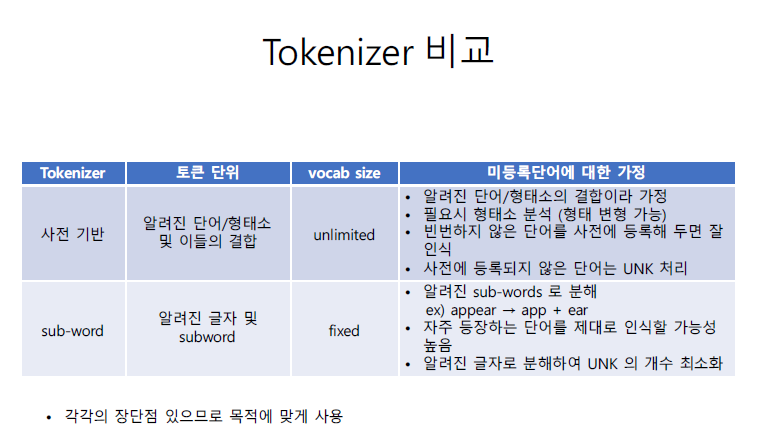

## Tokenization 방법
* rule-based tokenization (공백 또는구두점으로 분리)
    * 문제점: very big vocabulary 생성(ex. Transformer XL : 267,735) <br>
                -> large embedding matrix 생성 <br>
                -> memory, time complexity 증가 <br>
* Subword tokenization
    * 원칙: **빈번히 사용되는 단어**는 더 작은 subword로 나뉘어 지면 안된다.<br>
            **가끔 사용되는단어**는 의미있는 suvword로 나뉘어 져야 한다. <br>
            -> 교착어(한국어, 터키어, 일본어 등)의 token화에 유용. bert 104개 국어 version은 110,000 vacabulary size

## WPM(Word Piece Model) 개요
* 하나의 단어를 내부단어(subword)로 통계에 기반하여 띄어쓰기로 분리.
* 2015년 처음 제안되어 Google 번역기에서 사용(2016)
* 하나의 단어는 의미있는 여러 단어들의 조합으로 구성된 경우가 많기 때문에, 단어를 여러 단어로 분리하여 보겠다는 전처리 작업
* 입력 문장에서 띄어쓰기는 언더바(_)로 치환
* 기존의 띄어쓰기 언더바(_)로 치환하는 이유는 차후 다시 문장 복원을 위한 장치
* WPM은 BPE(Byte Pair Encoding) 알고리즘 사용
    * 1994년에 제안된 데이터 압축 알고리즘
    * 훈련 데이터에 있는 단어들을 모든 글자(characters) 또는 유니코드(unicode) 단위로 단어 집합(vocabulary)를 만들고, 가장 많이 등장하는 유니그램을 하나의 유니그램으로 통합

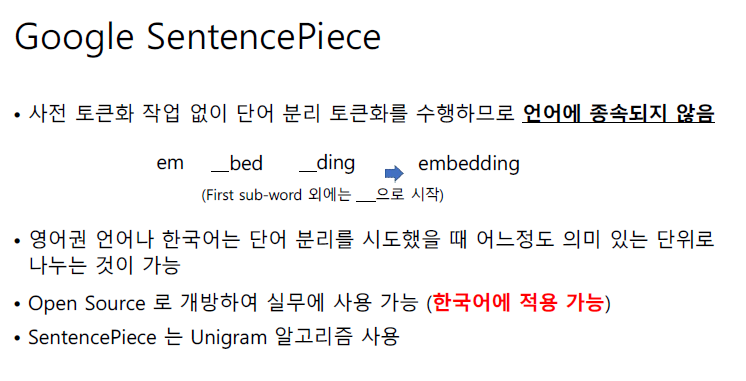

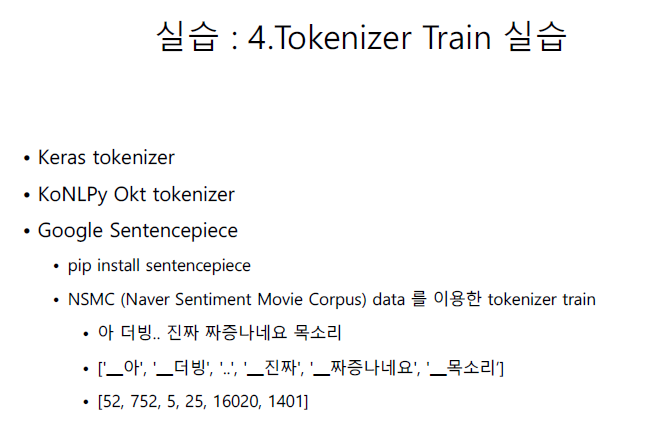

## Tokeizer 알아보기

In [1]:
!pip install -q KoNLPy
!pip install -U -q sentencepiece

In [2]:
sentences_E = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'I was born in Korea and graduaged University in USA.',
]
sentences_K = [
    "코로나가 심하다",
    "코비드-19가 심하다",
    '아버지가방에들어가신다',
    '아버지가 방에 들어가신다',
    '너무너무너무는 나카무라세이코가 불러 크게 히트한 노래입니다'
]

### 1. keras 기본 Tokenizer - rule-besed
* 공백 또는 구두점으로 분리
* 영어 단어별로 띄어쓰기가 철저히 지켜지는 언어

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 100, oov_token = '<OOV>')        # 빈도수 상위 100개로 구성
tokenizer.fit_on_texts(sentences_E)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'i': 2, 'love': 3, 'my': 4, 'dog': 5, 'in': 6, 'cat': 7, 'you': 8, 'was': 9, 'born': 10, 'korea': 11, 'and': 12, 'graduaged': 13, 'university': 14, 'usa': 15}


Keras의 rule base tokenizer로 한글을 tokenize

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 100, oov_token = '<OOV>')        # 빈도수 상위 100개로 구성
tokenizer.fit_on_texts(sentences_K)    # 위와 바뀐 부분: sentences_E => sentences_K

vocabulary_keras_korean = tokenizer.word_index
print(word_index)

{'<OOV>': 1, '심하다': 2, '코로나가': 3, '코비드': 4, '19가': 5, '아버지가방에들어가신다': 6, '아버지가': 7, '방에': 8, '들어가신다': 9, '너무너무너무는': 10, '나카무라세이코가': 11, '불러': 12, '크게': 13, '히트한': 14, '노래입니다': 15}


### 2. 단어 사전 기반 한국어 tokenizer 사용

In [13]:
from konlpy.tag import Okt
okt = Okt()

temp_X = []
for sent in sentences_K:      #한국어
    temp_X.append(okt.morphs(sent))         # morphs 형태소 분석
    print(okt.morphs(sent))

['코로나', '가', '심하다']
['코', '비드', '-', '19', '가', '심하다']
['아버지', '가방', '에', '들어가신다']
['아버지', '가', '방', '에', '들어가신다']
['너무', '너무', '너', '무', '는', '나카무라', '세이', '코', '가', '불러', '크게', '히트', '한', '노래', '입니다']


사전 기반 tokenize 후 Keras tokenizer로 vocbulary 생성

In [14]:
tokenizer = Tokenizer(num_words = 100, oov_token = '<OOV>')      # 빈도수 상위 100개로 구성
tokenizer.fit_on_texts(temp_X)
vocabulary_okt_keras = tokenizer.word_index
print(vocabulary_okt_keras)

{'<OOV>': 1, '가': 2, '심하다': 3, '코': 4, '아버지': 5, '에': 6, '들어가신다': 7, '너무': 8, '코로나': 9, '비드': 10, '-': 11, '19': 12, '가방': 13, '방': 14, '너': 15, '무': 16, '는': 17, '나카무라': 18, '세이': 19, '불러': 20, '크게': 21, '히트': 22, '한': 23, '노래': 24, '입니다': 25}


두 vocabulary 의 차이 비교

In [15]:
print(vocabulary_keras_korean)
print('-----------------------------------------------------------------')
print(vocabulary_okt_keras)

{'<OOV>': 1, '심하다': 2, '코로나가': 3, '코비드': 4, '19가': 5, '아버지가방에들어가신다': 6, '아버지가': 7, '방에': 8, '들어가신다': 9, '너무너무너무는': 10, '나카무라세이코가': 11, '불러': 12, '크게': 13, '히트한': 14, '노래입니다': 15}
-----------------------------------------------------------------
{'<OOV>': 1, '가': 2, '심하다': 3, '코': 4, '아버지': 5, '에': 6, '들어가신다': 7, '너무': 8, '코로나': 9, '비드': 10, '-': 11, '19': 12, '가방': 13, '방': 14, '너': 15, '무': 16, '는': 17, '나카무라': 18, '세이': 19, '불러': 20, '크게': 21, '히트': 22, '한': 23, '노래': 24, '입니다': 25}


### 단, Okt 사전에 미등록된 단어의 경우 정확한 tokenizing이 안된다.
* 사전에 단어를 추가해야 정확하게 분석한다. 나카무라세이코-고유명사
* 신조어가 나오면 새로 등록해야한다.

In [16]:
okt.pos('너무너무너무는 나카무라세이코가 불러 크게 히트한 노래입니다.')

[('너무', 'Adverb'),
 ('너무', 'Adverb'),
 ('너', 'Modifier'),
 ('무', 'Noun'),
 ('는', 'Josa'),
 ('나카무라', 'Noun'),
 ('세이', 'Noun'),
 ('코', 'Noun'),
 ('가', 'Josa'),
 ('불러', 'Verb'),
 ('크게', 'Noun'),
 ('히트', 'Noun'),
 ('한', 'Josa'),
 ('노래', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

### 3. Google SentencePiece Toeknizer
* NAVER Movie rating data를 이용한 sentencepiece tokenizr traning

In [19]:
import tensorflow as tf
import pandas as pd
import sentencepiece as spm
DATA_TRAIN_PATH = '../naver_movie/ratings_train.txt'

* pandas.read_csv에서 quoting = 3으로 설장해주면 인용구(따옴표)를 ㅁ쉬

In [20]:
train_data = pd.read_csv(DATA_TRAIN_PATH, sep='\t', quoting = 3)
print(train_data.shape)
train_data.head()

(150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [21]:
train_data.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [22]:
train_data.dropna(inplace = True)
train_data.shape

(149995, 3)

### 학습을 위해 text를 따로 저장

In [55]:
with open("../nsmc.txt", 'w', encoding = "utf-8") as f:
    for line in train_data.document.values:
        try:
            f.write(line + '\n')
        except: 
            print('write error --->', line)

In [56]:
# write가 잘 되었는지 확인
with open('../nsmc.txt', 'r', encoding = 'utf-8') as f:
    nsmc_txt = f.read().split('\n')
print(len(nsmc_txt))
print(nsmc_txt[0])

149996
아 더빙.. 진짜 짜증나네요 목소리


In [59]:
input_file = '../nsmc.txt'
vocab_size = 30000
prefix = 'nsmc'

templates = '--input={} --model_prefix={} --vocab_size={}'
cmd = templates.format(input_file, prefix, vocab_size)
cmd

'--input=../nsmc.txt --model_prefix=nsmc --vocab_size=30000'

### sentencepiece tokenizer training

In [60]:
# vocabulary 사전을 만들고 있음
spm.SentencePieceTrainer.Train(cmd)     # nsmc.model,  nsmc.vocab 생성됨

In [61]:
sp = spm.SentencePieceProcessor()
sp.Load('{}.model'.format(prefix))

True

In [62]:
for t in train_data.document.values[:3]:
    print(t)
    print(sp.encode_as_pieces(t))       #띄어쓰기 부분 _로 
    print(sp.encode_as_ids(t),'\n')

아 더빙.. 진짜 짜증나네요 목소리
['▁아', '▁더빙', '..', '▁진짜', '▁짜증나네요', '▁목소리']
[53, 751, 5, 25, 15853, 1405] 

흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
['▁흠', '...', '포스터보고', '▁초딩영화', '줄', '....', '오버', '연기', '조차', '▁가볍지', '▁않', '구나']
[1239, 6, 12536, 18315, 396, 47, 17886, 395, 1134, 6404, 1063, 423] 

너무재밓었다그래서보는것을추천한다
['▁너무', '재', '밓', '었다', '그래서', '보는것', '을', '추천', '한다']
[18, 611, 21195, 640, 2752, 11171, 14, 2315, 298] 



# NER(Named Entity Recognition)
# 개체명 인식
* 이름을 가진 **개체(Named Entity)**를 **인식**하는 것
    * 즉, 어떤 이름을 의미하는 단어를 보고는 그 단어가 어떤 유형(사람,장소,조직 등)을 의미하는 단어인지를 **인식**하는 것 <br> 
    ex) 삼성-회사, 미국-나라
* 개체명 인식은 **챗봇** 등에서 필요로하는 주요 전처리 작업
    * 질문 문장의 어절을 일반화시키는 과정에서 개체명(Named entity) 인식 사전을 활용
* 도메인 또는 목적에 특화되도록 개체명 인식을 정확하게 하는 방법 중 하나는 기존에 공개된 개체명 인식기를 사용하는 것이 아니라, 직접 목적에 맞는 데이터를 준비하고 기계를 훈련시켜 모델을 만드는 방법

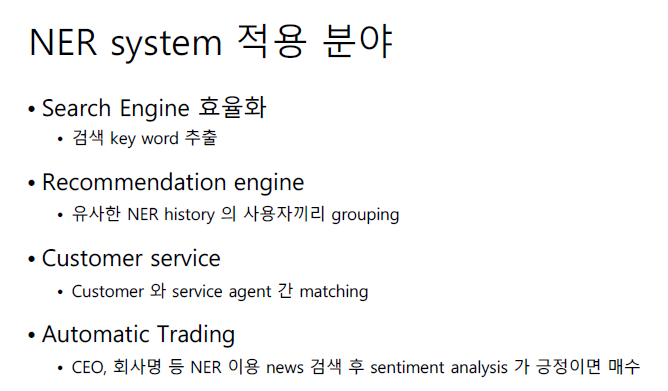
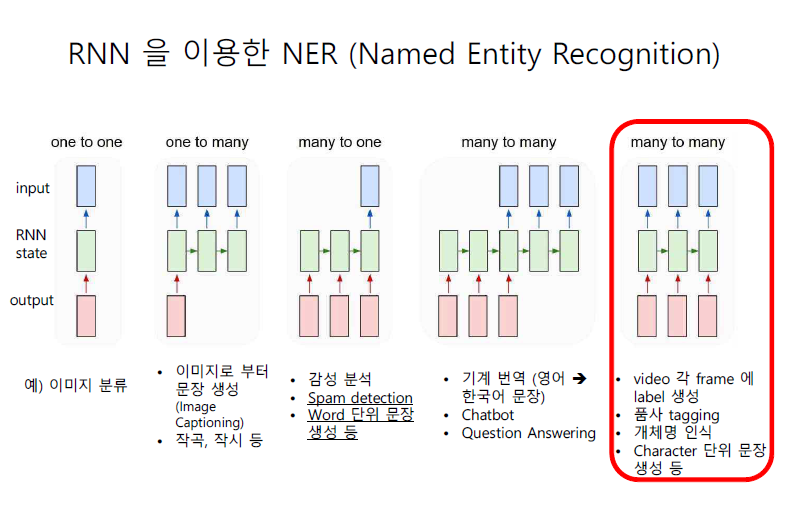

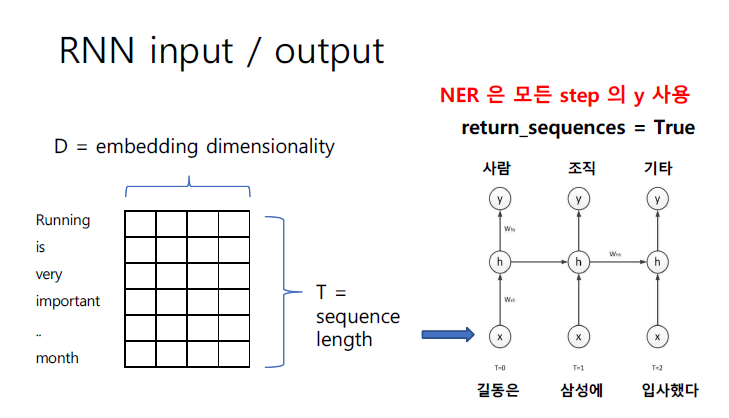

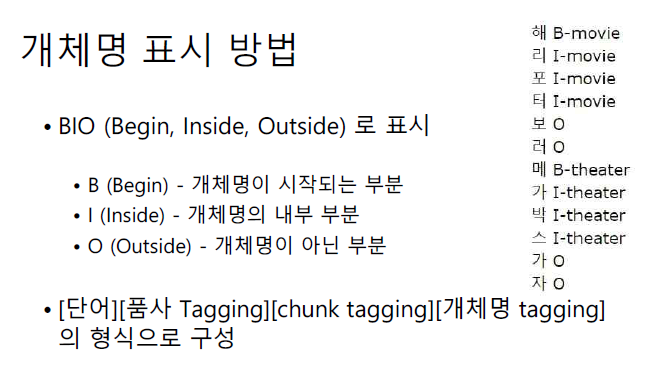
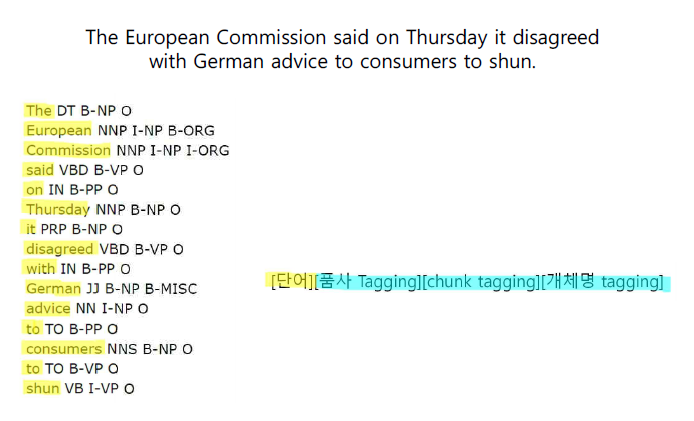
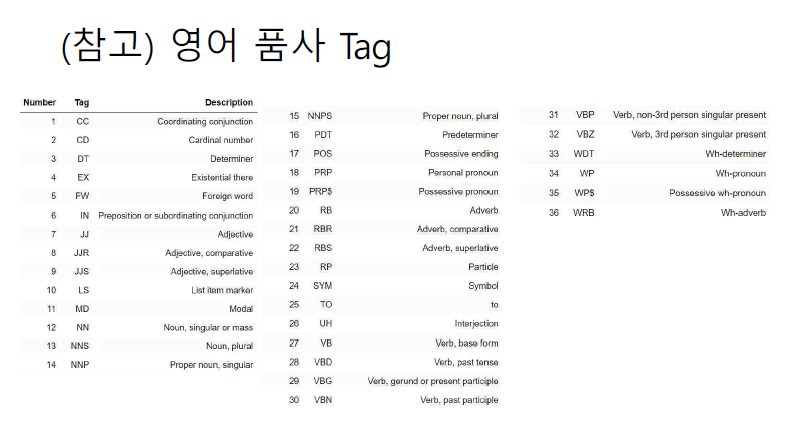
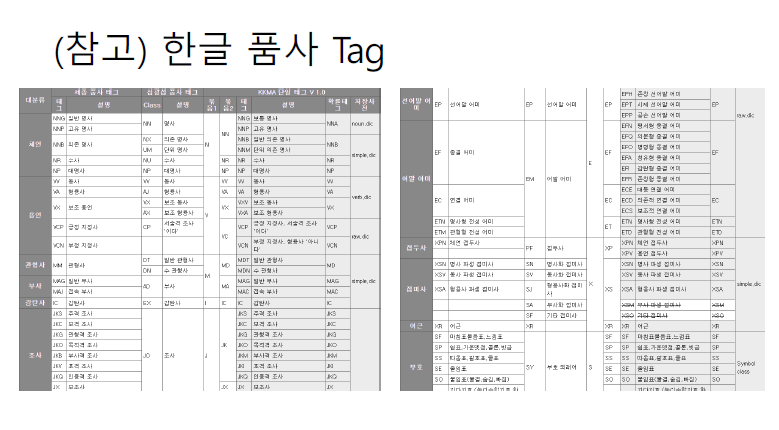

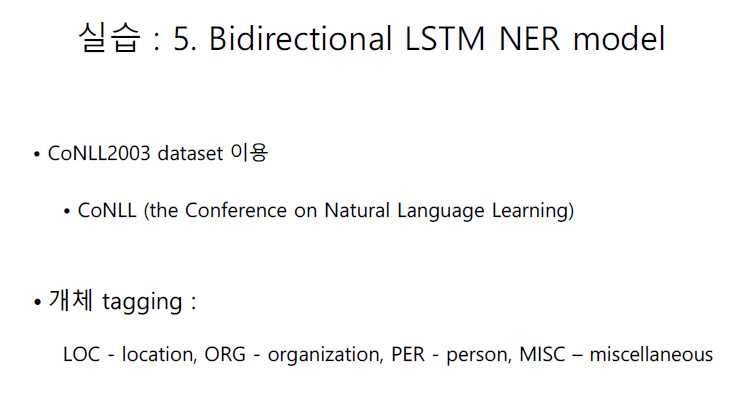